In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROOQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm=ChatGroq(model_name="llama-3.1-8b-instant",temperature=0.7)

result=llm.invoke("Howdy")
result

AIMessage(content="Howdy back atcha. How's your day goin' so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 37, 'total_tokens': 54, 'completion_time': 0.029908541, 'prompt_time': 0.002350479, 'queue_time': 0.214723588, 'total_time': 0.03225902}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c54ae48ece', 'finish_reason': 'stop', 'logprobs': None}, id='run--ffa777b2-81c9-462c-9f4c-d4feff6fe346-0', usage_metadata={'input_tokens': 37, 'output_tokens': 17, 'total_tokens': 54})

In [2]:
from typing import TypedDict

class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [3]:
# Nodes
def generate_characters(state:State):
    """Generate characters"""
    characters = llm.invoke(f"Generate two characters with name and brief peculiar traits for the story about {state['topic']}.")
    return {"characters":characters.content}

def generate_settings(state:State):
    """Generate settings"""
    settings = llm.invoke(f"Generate a setting for the story about {state['topic']}. Do not deviate from the topic.")
    return {"settings":settings.content}

def generate_premises(state:State):
    """Generate premises"""
    premises = llm.invoke(f"Generate a short premise for the story about {state['topic']}.")
    return {"premises":premises.content}

def generate_story_intro(state:State):
    """Generate story intro"""
    story_intro = llm.invoke(
        f"""
ONLY OUTPUT THE STORY TEXT. DO NOT ADD ANY TITLES, HEADINGS, SEPARATORS, INTRODUCTIONS, EXPLANATIONS, OR COMMENTARY. 
Write a short story intro using the following elements. 
The story must be concise, clear, and short enough to read aloud( STRICTLY ABOUT 80-100 words).  
Characters: {state['characters']}
Settings: {state['settings']}
Premises: {state['premises']}
"""

)
    return {"story_intro":story_intro.content}

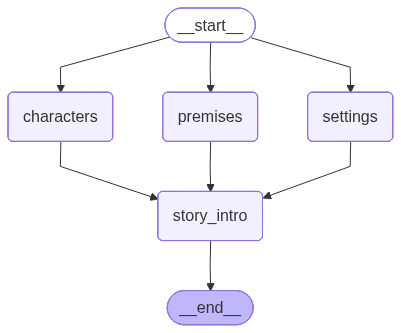

In [4]:
# Build State Graph
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END

graph=StateGraph(State)

# Adding nodes to the graph
graph.add_node("characters",generate_characters)
graph.add_node("settings",generate_settings)
graph.add_node("premises",generate_premises)
graph.add_node("story_intro",generate_story_intro)

# Adding edges
graph.add_edge(START,"characters")
graph.add_edge(START,"settings")
graph.add_edge(START,"premises")
graph.add_edge("characters","story_intro")
graph.add_edge("settings","story_intro")
graph.add_edge("premises","story_intro")
graph.add_edge("story_intro",END)

#Compile graph
graph=graph.compile()

graph_image=graph.get_graph().draw_mermaid_png()
display(Image(graph_image))
 

In [5]:
result=graph.invoke({"topic":"Musician falling in love with a singer"})
print(result['story_intro'])

As Ethan Blackwood stepped off the worn streets of the French Quarter, the vibrant sounds of New Orleans enveloped him like a warm hug. He breathed in the scent of spicy Creole cuisine and the sweet aroma of blooming jasmine, feeling the city's energy coursing through his veins. His eyes scanned the crowded sidewalk, searching for a glimpse of Luna Nightingale, the singer who had captured his attention with her ethereal voice and haunted lyrics. The night air seemed to vibrate with possibility as Ethan made his way to the small jazz club, The Red Door, where Luna was rumored to be performing. He adjusted his guitar strap, Melody secure against his chest, and pushed open the creaky door, ready to immerse himself in the city's infectious rhythm.


In [6]:
import subprocess

text = result['story_intro']
if not isinstance(text, str):
    text = str(text)

# Speak immediately (built-in macOS TTS)
subprocess.run(["say", text])

CompletedProcess(args=['say', "As Ethan Blackwood stepped off the worn streets of the French Quarter, the vibrant sounds of New Orleans enveloped him like a warm hug. He breathed in the scent of spicy Creole cuisine and the sweet aroma of blooming jasmine, feeling the city's energy coursing through his veins. His eyes scanned the crowded sidewalk, searching for a glimpse of Luna Nightingale, the singer who had captured his attention with her ethereal voice and haunted lyrics. The night air seemed to vibrate with possibility as Ethan made his way to the small jazz club, The Red Door, where Luna was rumored to be performing. He adjusted his guitar strap, Melody secure against his chest, and pushed open the creaky door, ready to immerse himself in the city's infectious rhythm."], returncode=0)